In [228]:
# Import Necessary Data Libraries
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

# File to Load Using Relative Paths for Universality 
creditscore1000absolute = Path("credit_score.csv").parent.absolute()
creditscore1000relative = Path("Resources/credit_score.csv")
creditscore1000data = Path.joinpath(creditscore1000absolute, creditscore1000relative)
creditscorestateabsolute = Path("loan_data_clean.csv").parent.absolute()
creditscorestaterelative = Path("Resources/loan_data_clean.csv")
creditscorestatedata = Path.joinpath(creditscorestateabsolute, creditscorestaterelative)

# Read Credit Data File and store into Pandas DataFrames
creditscore1000 = pd.read_csv(creditscore1000data)
creditscorestate = pd.read_csv(creditscorestatedata)
print(creditscorestate.columns.tolist())

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'title', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']


In [3]:
#Isolate Income, Debt Ratio, and Credit Score for Manipulation
correlationsubset1 = creditscore1000.loc[:,["YEARLY_INCOME","CURRENT_DEBT_TO_YEARLY_INCOME_RATIO", "CREDIT_SCORE"]].astype(int)
correlationsubset1

,YEARLY_INCOME,CURRENT_DEBT_TO_YEARLY_INCOME_RATIO,CREDIT_SCORE
0,33269,16,444
1,77158,4,625
2,80657,7,559
3,149971,16,473
4,181636,9,596
...,...,...,...
995,171756,3,582
996,262629,10,525
997,175426,7,566
998,410661,6,544


In [4]:
#Use Spearman Correlation to Find Suitable Metric to Project on Other Credt Data
#Source:  https://realpython.com/numpy-scipy-pandas-correlation-python/#rank-correlation
correlationsubset1.corr(method="spearman")

,YEARLY_INCOME,CURRENT_DEBT_TO_YEARLY_INCOME_RATIO,CREDIT_SCORE
YEARLY_INCOME,1.000000,0.273576,-0.060344
CURRENT_DEBT_TO_YEARLY_INCOME_RATIO,0.273576,1.000000,-0.793131
CREDIT_SCORE,-0.060344,-0.793131,1.000000


In [5]:
#Separate Credit Score and Debt Ratio into Quintile Value
quintiles = correlationsubset1.quantile([.2, .4, .6, .8], axis=0)
quintiles

,YEARLY_INCOME,CURRENT_DEBT_TO_YEARLY_INCOME_RATIO,CREDIT_SCORE
0.2,22141.6,1.0,544.8
0.4,58888.0,3.0,580.0
0.6,122150.4,6.0,612.0
0.8,202504.6,9.0,636.0


In [6]:
#Define Functions to Segregate Data into Quintiles
#https://www.homeandlearn.co.uk/data-analysis-pandas/pandas-apply-function.html
def creditquintiles(val):
    if val <= 544.8:
        return int(1)
    elif val > 544.8 and val <= 580.0:
        return int(2)
    elif val > 580.0 and val <= 612.0:
        return int(3)
    elif val > 612.0 and val <= 636.0:
        return int(4)
    else:
        return int(5)
    
def debtratioquintiles(val):
    if val <= 1.0:
        return int(1)
    elif val > 1.0 and val <= 3.0:
        return int(2)
    elif val > 3.0 and val <= 6.0:
        return int(3)
    elif val > 6.0 and val <= 9.0:
        return int(4)
    else:
        return int(5)


In [7]:
#Apply Functions
#Source: https://www.homeandlearn.co.uk/data-analysis-pandas/pandas-apply-function.html
correlationsubset1["Credit Quint"] = correlationsubset1["CREDIT_SCORE"].apply(creditquintiles)
correlationsubset1["Debt Quint"] =  correlationsubset1["CURRENT_DEBT_TO_YEARLY_INCOME_RATIO"].apply(debtratioquintiles)

#Add Column Using lambda loop to determine matching quintiles
#Source: https://stackoverflow.com/questions/50730408/implementing-if-else-in-python-dataframe-using-lambda-when-there-are-multiple-va
correlationsubset1['Match'] = correlationsubset1.apply(lambda x: "Yes" if (x["Credit Quint"] == x["Debt Quint"]) else "No", axis=1)

#Delete overlapping quintiles for cleaner data
correlationsubset2 = correlationsubset1.drop(correlationsubset1[correlationsubset1['Match'] == "Yes"].index)
correlationsubset1

,YEARLY_INCOME,CURRENT_DEBT_TO_YEARLY_INCOME_RATIO,CREDIT_SCORE,Credit Quint,Debt Quint,Match
0,33269,16,444,1,5,No
1,77158,4,625,4,3,No
2,80657,7,559,2,4,No
3,149971,16,473,1,5,No
4,181636,9,596,3,4,No
...,...,...,...,...,...,...
995,171756,3,582,3,2,No
996,262629,10,525,1,5,No
997,175426,7,566,2,4,No
998,410661,6,544,1,3,No


In [8]:
#Use Summary Statistics to Determine Debt Ratio Quintile Averages to Project Credit Score Quintile on Larger Dataset
groupbycreditquint = correlationsubset2.groupby(["Credit Quint"])
debtratiorangespercreditquint = groupbycreditquint.agg({"CURRENT_DEBT_TO_YEARLY_INCOME_RATIO":["min", "max", "mean", "std"]})
debtratiorangespercreditquint

CURRENT_DEBT_TO_YEARLY_INCOME_RATIO                         
                                             min max       mean       std
Credit Quint                                                             
1                                              3  37  13.700000  6.642334
2                                              0  16   7.421053  2.582312
3                                              0  12   3.418919  3.376617
4                                              0  10   1.963542  1.865567
5                                              0   7   1.260204  1.607243

In [9]:
#Define Function to Segregate Credit Quintiles by Debt Ratio

def creditbasedondti(val):
    if val <= 1.260204:
        return int(5)
    elif val > 1.260204 and val <= 1.963542:
        return int(4)
    elif val > 1.963542 and val <= 3.418919:
        return int(3)
    elif val > 3.418919 and val <= 7.421053:
        return int(2)
    else:
        return int(1)



In [23]:
#Create Credit Quintile Coloumn on Large Dataset Using Function
creditscorestate["Credit Quint"]=creditscorestate["dti"].apply(creditbasedondti)
isolatedinfo=creditscorestate.loc[:,["addr_state","Credit Quint"]]
isolatedinfo["Count"]= 1

#Create Summarry Groupby Based on State and Credit Quintile
Count = isolatedinfo.groupby(["addr_state", "Credit Quint"])
Count = Count.agg(["sum"])


Count
                          sum
addr_state Credit Quint      
AK         1              568
           2               32
           3               10
           4                3
           5                5
...                       ...
WY         1              559
           2               26
           3                4
           4                1
           5                4

[237 rows x 1 columns]

In [28]:
#Sort Grouping by Ascending Credit Quintile
Count2 = Count.sort_values(by= "Credit Quint", ascending=False)
Count2.columns=["Count"]
Count2

,,Count
addr_state,Credit Quint,
WY,5,4
DC,5,6
MO,5,19
MN,5,14
MI,5,18
...,...,...
ND,1,410
NC,1,7457
MS,1,1728


In [29]:
#Save Result to CSV to Preserve Format while Freeing Indexes from Groupby
Count2absolute = Path("credit_score.csv").parent.absolute()
Count2relative = Path("Resources/states.csv")
Count2placement = Path.joinpath(Count2absolute, Count2relative)
Count2.to_csv(Count2placement)

In [31]:
#Read CSV into New Dataframe
Count3absolute = Path("states.csv").parent.absolute()
Count3relative = Path("Resources/states.csv")
Count3data = Path.joinpath(Count3absolute, Count3relative)
Count3 = pd.read_csv(Count3data)
Count3

,addr_state,Credit Quint,Count
0,WY,5,4
1,DC,5,6
2,MO,5,19
3,MN,5,14
4,MI,5,18
...,...,...,...
232,ND,1,410
233,NC,1,7457
234,MS,1,1728
235,MO,1,4401


In [120]:
#Failed Attempt to Create State Reference Table for Nested Tabulation Loop
statereference = Count3.loc[:,["addr_state"]]
statereference = statereference.drop_duplicates()
Count3=Count3.sort_values(by= "addr_state", ascending=False)
statereference["addr_state"] = statereference["addr_state"].astype(str)
statereference

,addr_state
0,WY
131,WV
140,WI
193,WA
64,VT
65,VA
181,UT
76,TX
162,TN
159,SD


In [148]:
basestats = pd.DataFrame({"State":[], "Count 1":[], "Count 2":[], "Count 3":[], "Count 4":[], "Count 5":[]})
Holdingdict = {"State":[], "Count 1":[], "Count 2":[], "Count 3":[], "Count 4":[], "Count 5":[]}

In [214]:
#Failed attempt at creating a tabulated table for percentage of 4 and 5 by state to sort into top 3. Used excel instead.

statelist = []
fivecountlist = []
fourcountlist = []
threecountlist = []
twocountlist = []
onecountlist = []

for indexa, x in statereference.iterrows():
    statepass = x["addr_state"]
    state =x["addr_state"]
    statelist.append(state)
    for indexb, y in Count3.iterrows():
        if y["addr_state"] == statepass:
            for indexc, z in Count3.iterrows():
                if z["Credit Quint"] == 5 and z["addr_state"] == statepass:
                    data = Count3[Count3["Credit Quint"] == 5]
                    fivecount = data.groupby("addr_state")["Count"].cumsum()
                    fivecountlist.append(fivecount)
                elif z["Credit Quint"] == 4:
                    fourcount = Count3.loc[Count3["Credit Quint"] == z["Count"], "Count"].sum()
                    fourcountlist.append(fourcount)
                elif z["Credit Quint"] == 3:
                    threecount = Count3.loc[Count3["Credit Quint"] == z["Count"], "Count"].sum()
                    threecountlist.append(threecount)
                elif z["Credit Quint"] == 2:
                    twocount = Count3.loc[Count3["Credit Quint"] == z["Count"], "Count"].sum()
                    twocountlist.append(twocount)
                elif z["Credit Quint"] == 1:
                    onecount = Count3.loc[Count3["Credit Quint"] == z["Count"], "Count"].sum()
                    onecountlist.append(onecount)
                else:
                    break
        else:
            break

    
Holdingdict.update({"State": state1})
fivecountlist

[0       4
 39      5
 15     10
 9      21
 36      1
 19     26
 32      4
 26     87
 21     19
 22     10
 23      3
 24     27
 25     17
 20      6
 27     19
 29    124
 30     20
 31      4
 33     37
 34      4
 28     37
 18      2
 17     10
 2      19
 3      14
 4      18
 5      22
 6      20
 7      15
 8       5
 10      5
 11      9
 12     50
 13      7
 14     30
 16     66
 35      1
 1       6
 40     19
 44     10
 43    204
 37     26
 41      3
 38      6
 42      5
 Name: Count, dtype: int64,
 0       4
 39      5
 15     10
 9      21
 36      1
 19     26
 32      4
 26     87
 21     19
 22     10
 23      3
 24     27
 25     17
 20      6
 27     19
 29    124
 30     20
 31      4
 33     37
 34      4
 28     37
 18      2
 17     10
 2      19
 3      14
 4      18
 5      22
 6      20
 7      15
 8       5
 10      5
 11      9
 12     50
 13      7
 14     30
 16     66
 35      1
 1       6
 40     19
 44     10
 43    204
 37     26
 41      3
 38 

In [219]:
#Import Tabulated Credit Quintile Tabulation from Excel. Sorted Descending so Top Three States with Highest Credit Quintile Proportions on Top. 
tabulatedstateabsolute = Path("States_by_percentage.csv").parent.absolute()
tabulatedstaterelative = Path("Resources/States_by_percentage.csv")
tabulatedstatedata = Path.joinpath(tabulatedstateabsolute, tabulatedstaterelative)
tabulatedstate = pd.read_csv(tabulatedstatedata)
tabulatedstate

,State,Percent 4 and 5,1,2,3
0,DC,0.015670,0.866097,0.106838,0.011396
1,AK,0.012945,0.919094,0.051780,0.016181
2,NY,0.011241,0.868867,0.100537,0.019355
3,CA,0.009990,0.886346,0.087858,0.015806
4,CT,0.009111,0.896000,0.082000,0.012889
5,LA,0.009045,0.925947,0.056812,0.008197
6,NV,0.008978,0.912469,0.067581,0.010973
7,WY,0.008418,0.941077,0.043771,0.006734
8,WA,0.007789,0.916187,0.067389,0.008635
9,MA,0.007753,0.898464,0.078873,0.014910


In [239]:
#Isolate DC Data for Pie Chart
#Source: https://www.tutorialspoint.com/python-plot-a-pie-chart-for-pandas-dataframe-with-matplotlib, https://www.w3schools.com/python/matplotlib_pie_charts.asp

DCtable = tabulatedstate.loc[0:0,["State","Percent 4 and 5", "1", "2", "3"]]
DCtable2 = pd.DataFrame({"Percent Sum": [0.01567, 0.866097, 0.106838, 0.011396], "Credit Quintile": ["5 and 4", "1", "2", "3"]})
DCtable2

,Percent Sum,Credit Quintile
0,0.015670,5 and 4
1,0.866097,1
2,0.106838,2
3,0.011396,3


In [241]:
#Isolate AK Data for Pie Chart
AKtable = tabulatedstate.loc[1:1,["State","Percent 4 and 5", "1", "2", "3"]]
AKtable2 = pd.DataFrame({"Percent Sum": [0.012945, 0.919094, 0.05178, 0.016181], "Credit Quintile": ["5 and 4", "1", "2", "3"]})
AKtable2

,Percent Sum,Credit Quintile
0,0.012945,5 and 4
1,0.919094,1
2,0.051780,2
3,0.016181,3


In [242]:
#Isolate NY Data for Pie Chart
NYtable = tabulatedstate.loc[2:2,["State","Percent 4 and 5", "1", "2", "3"]]
NYtable2 = pd.DataFrame({"Percent Sum": [0.011241, 0.868867, 0.100537, 0.019355], "Credit Quintile": ["5 and 4", "1", "2", "3"]})
NYtable2

,Percent Sum,Credit Quintile
0,0.011241,5 and 4
1,0.868867,1
2,0.100537,2
3,0.019355,3


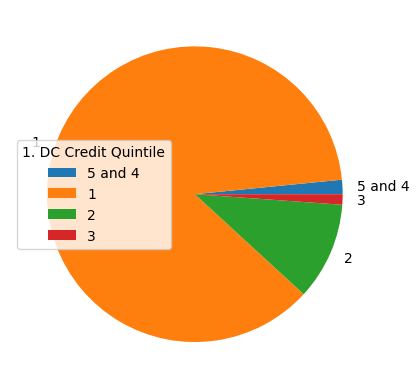

In [255]:
#DC Pie Chart
plt.pie(DCtable2["Percent Sum"], labels = DCtable2["Credit Quintile"])
plt.legend(title = "1. DC Credit Quintile")
plt.show()

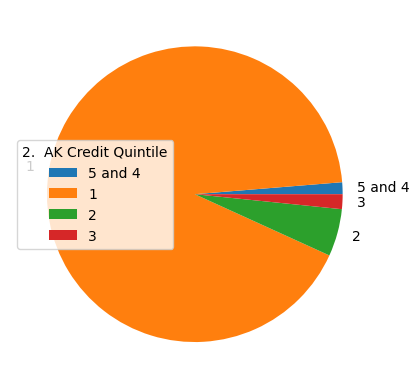

In [256]:
#AK Pie Chart
plt.pie(AKtable2["Percent Sum"], labels = AKtable2["Credit Quintile"])
plt.legend(title = "2.  AK Credit Quintile")
plt.show()

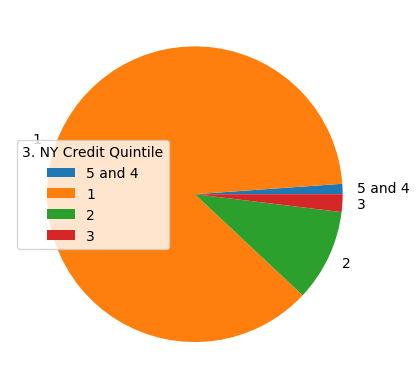

In [257]:
#NY Pie Chart
plt.pie(NYtable2["Percent Sum"], labels = NYtable2["Credit Quintile"])
plt.legend(title = "3. NY Credit Quintile")
plt.show()